/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_64794/2418883626.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  V_Social = pt.load(f"{wk_dir}/V_matrices_Soc

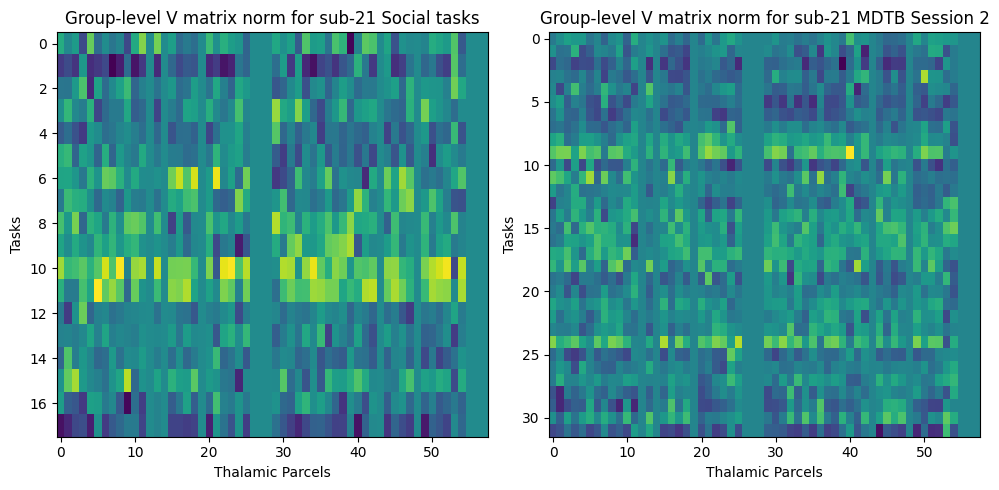

In [1]:
#V vector visualization

import torch as pt
import numpy as np
import matplotlib.pyplot as plt

wk_dir = '/Users/incehusain/fs_projects'
subj = 'sub-21'

V_Social = pt.load(f"{wk_dir}/V_matrices_Social/V_group_{subj}_norm.pt")
V_mdtb_ses2 = pt.load(f"{wk_dir}/V_matrices_MDTB_ses2/V_group_{subj}_norm.pt")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_subj = axs[0].imshow(V_Social, aspect='auto', cmap='viridis')    
axs[0].set_title(f'Group-level V matrix norm for {subj} Social tasks')
axs[0].set_xlabel('Thalamic Parcels')
axs[0].set_ylabel('Tasks')
#fig.colorbar(im_subj, ax=axs[0],label='Normalized activation level')

im_group = axs[1].imshow(V_mdtb_ses2, aspect='auto', cmap='viridis') 
axs[1].set_title(f'Group-level V matrix norm for {subj} MDTB Session 2')
axs[1].set_xlabel('Thalamic Parcels')
axs[1].set_ylabel('Tasks')


plt.tight_layout()  
plt.show()  


/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_2547/2230864937.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  parcel = pt.load(f"{wk_dir}/cosine_similariti

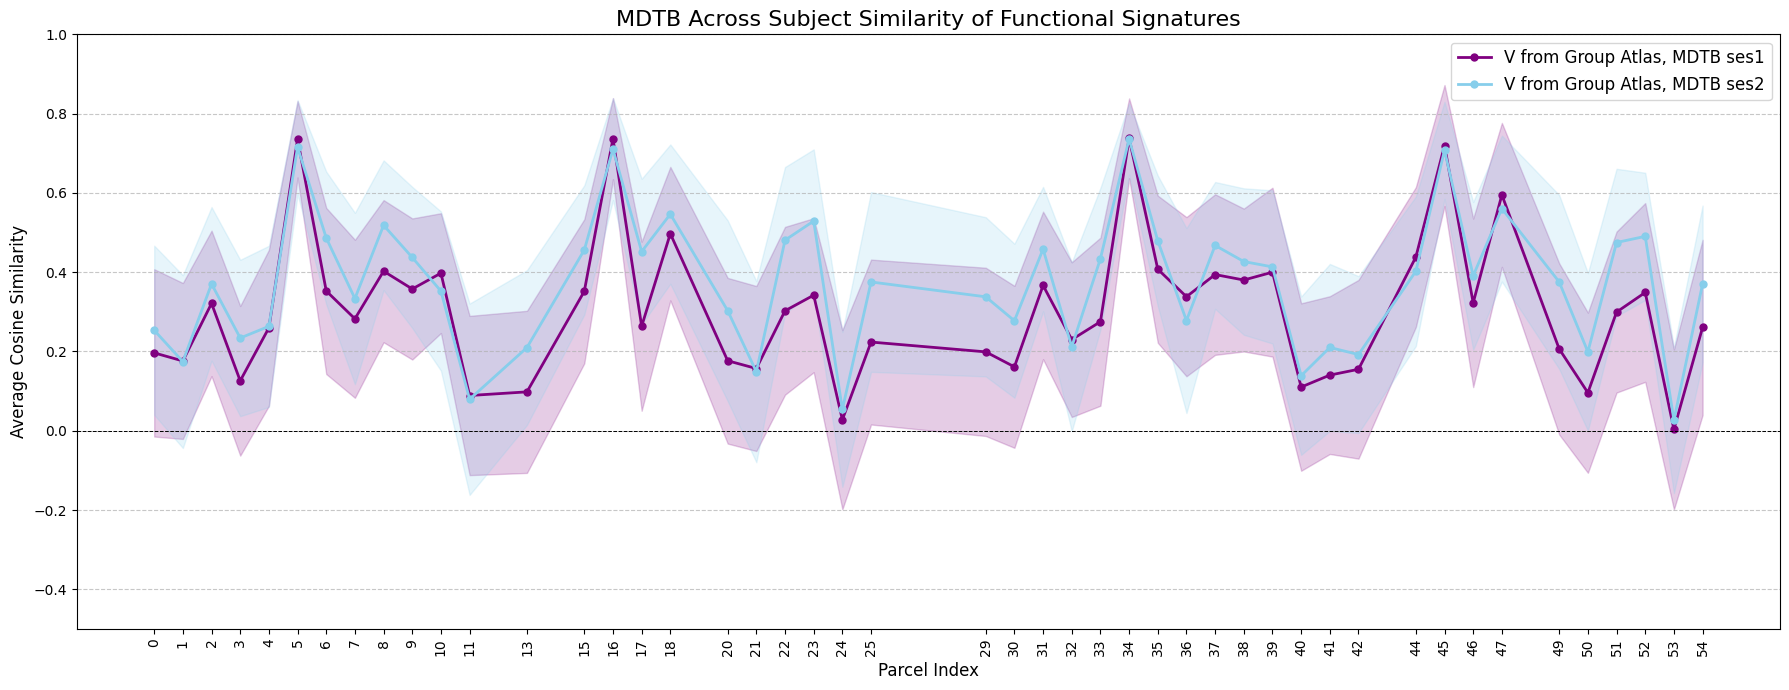

In [51]:
import torch as pt
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats


wk_dir = '/Users/incehusain/fs_projects'

dataset = 'MDTB'

parcel = pt.load(f"{wk_dir}/cosine_similarities_{dataset}/ses1_cosine_btwn_subj_parcels_group.pt")
parcel2 = pt.load(f"{wk_dir}/cosine_similarities_{dataset}/ses2_cosine_btwn_subj_parcels_group.pt")

mean = np.array([arr.mean() for arr in parcel])  
mean2 = np.array([arr.mean() for arr in parcel2])

std = np.array([arr.std() for arr in parcel])
std2 = np.array([arr.std() for arr in parcel2])

num_parcels = len(parcel)   
parcel_indices = np.arange(num_parcels)

mask = mean != 0
filtered_indices = parcel_indices[mask]
filtered_mean = mean[mask]  
filtered_std = std[mask]

mask2 = mean2 != 0
filtered_indices2 = parcel_indices[mask2]
filtered_mean2 = mean2[mask2]  
filtered_std2 = std2[mask2]

fig, ax = plt.subplots(figsize=(18, 7))

ax.plot(filtered_indices, filtered_mean, 'o-', label=f'V from Group Atlas, {dataset} ses1', color='purple', linewidth=2, markersize=5)
ax.fill_between(filtered_indices, filtered_mean - filtered_std, filtered_mean + filtered_std, color='purple', alpha=0.2)

ax.plot(filtered_indices2, filtered_mean2, 'o-', label=f'V from Group Atlas, {dataset} ses2', color='skyblue', linewidth=2, markersize=5)
ax.fill_between(filtered_indices2, filtered_mean2 - filtered_std2, filtered_mean2 + filtered_std2, color='skyblue', alpha=0.2)

ax.set_title(f'{dataset} Across Subject Similarity of Functional Signatures', fontsize=16)
ax.set_xlabel('Parcel Index', fontsize=12)
ax.set_ylabel('Average Cosine Similarity', fontsize=12)
ax.set_xticks(filtered_indices)
if num_parcels > 30:
    ax.tick_params(axis='x', labelrotation=90) 

ax.set_ylim(-0.5, 1)

ax.axhline(0, color='black', linestyle='--', linewidth=0.7)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#t_stat, p_value = stats.ttest_rel(mean_Social, mean_mdtb_ses2)   
#print(f"T-statistic: {t_stat}, P-value: {p_value}")

/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_64794/246694514.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Social = pt.load(f"{wk_dir}/cosine_similaritie

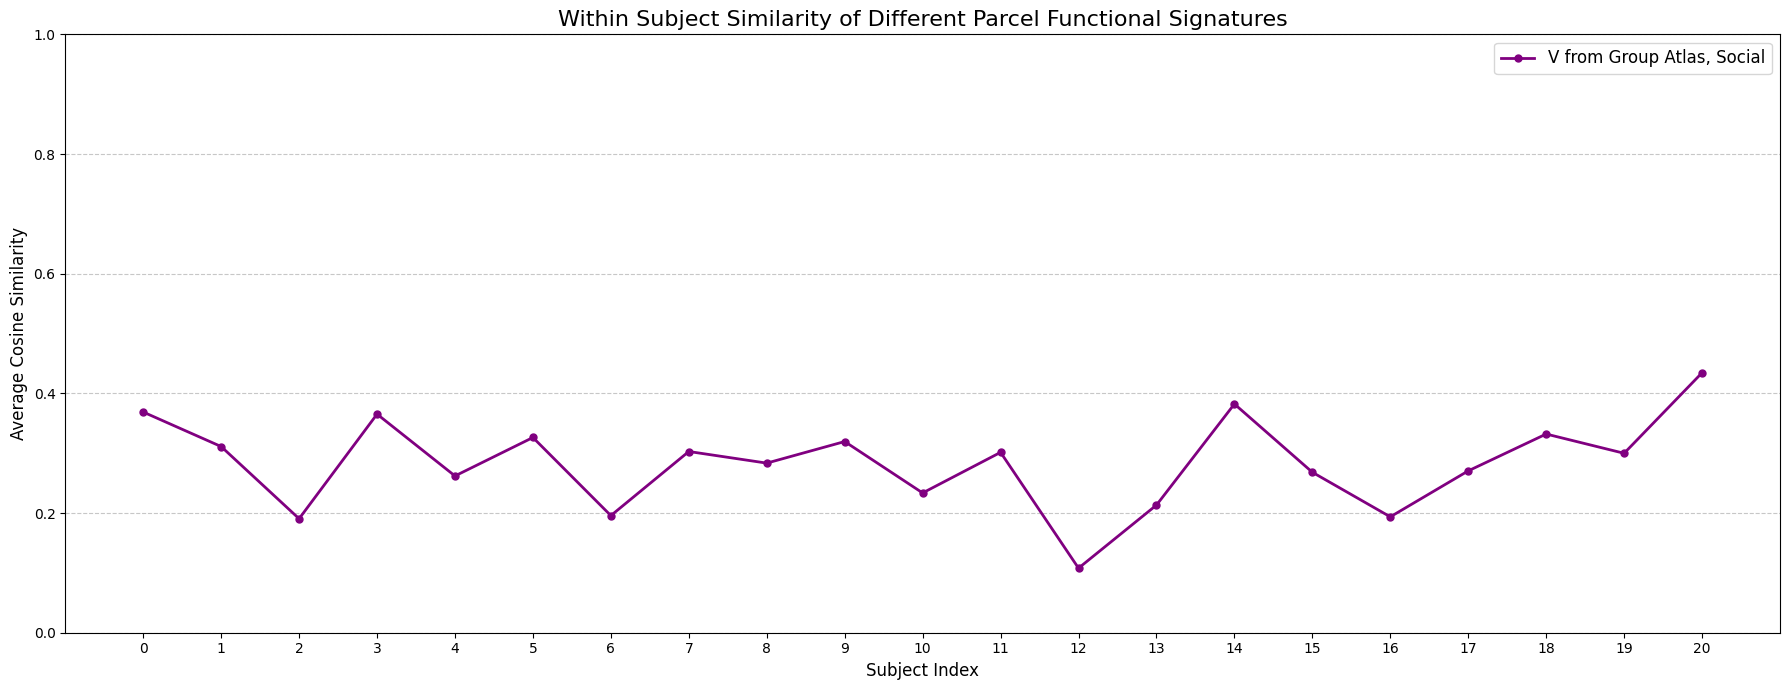

In [3]:
import torch as pt
import numpy as np
import matplotlib.pyplot as plt

wk_dir = '/Users/incehusain/fs_projects'

Social = pt.load(f"{wk_dir}/cosine_similarities_Social/cosine_within_subj_groupV.pt")
#mdtb_ses2 = pt.load(f"{wk_dir}/cosine_similarities_MDTB/cosine_within_subj_groupV_mdtb_ses2.pt")

num_parcels = len(Social)   
parcel_indices = np.arange(num_parcels)

fig, ax = plt.subplots(figsize=(18, 7))

ax.plot(parcel_indices, Social, 'o-', label='V from Group Atlas, Social', color='purple', linewidth=2, markersize=5)
#ax.fill_between(parcel_indices, mean_indiv - std_indiv, mean_indiv + std_indiv, color='purple', alpha=0.2)

#ax.plot(parcel_indices, mdtb_ses2, 'o-', label='V from Group Atlas, MDTB-ses2', color='skyblue', linewidth=2, markersize=5)
#ax.fill_between(parcel_indices, mean_group - std_group, mean_group + std_group, color='skyblue', alpha=0.2)

ax.set_title('Within Subject Similarity of Different Parcel Functional Signatures', fontsize=16)
ax.set_xlabel('Subject Index', fontsize=12)
ax.set_ylabel('Average Cosine Similarity', fontsize=12)
ax.set_xticks(parcel_indices)
if num_parcels > 30:
    ax.tick_params(axis='x', labelrotation=90) 

ax.set_ylim(0, 1)

ax.axhline(0, color='black', linestyle='--', linewidth=0.7)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_2547/925378716.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  avg_all_parcels = pt.load(f"{wk_dir}/cosine_sim

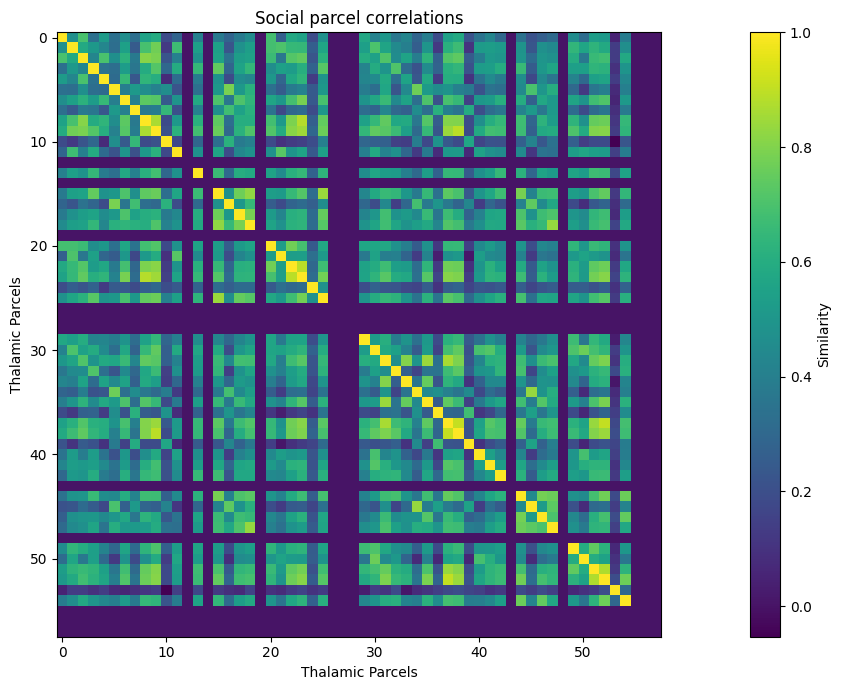

In [25]:
#parcel correlations visualization 

import torch as pt
import numpy as np
import matplotlib.pyplot as plt

wk_dir = '/Users/incehusain/fs_projects'

avg_all_parcels = pt.load(f"{wk_dir}/cosine_similarities_Language/cosine_avg_parcels_Language_allsub.pt")

num_parcels = avg_all_parcels.shape[0]  
parcel_indices = np.arange(num_parcels) 

fig, ax = plt.subplots(figsize=(18, 7))

im = ax.imshow(avg_all_parcels, cmap='viridis', vmin=np.min(avg_all_parcels), vmax=1)

ax.set_title(f'Social parcel correlations')
ax.set_xlabel('Thalamic Parcels')
ax.set_ylabel('Thalamic Parcels')

fig.colorbar(im, ax=ax,label='Similarity')

plt.tight_layout()  
plt.show()  


In [23]:
#extracting datasets

import Functional_Fusion.dataset as ds

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion_new'


dataset = ds.DataSetLanguage(base_dir + '/Language')
dataset.extract_all(ses_id='ses-localizerfm',
                    type='CondAll',
                    atlas='MNISymThalamus1',
                    subj=[9, 10, 11, 14, 15, 16])


Atlasmap sub-12
Extract sub-12
Atlasmap sub-13
Extract sub-13
Atlasmap sub-14
Extract sub-14
Atlasmap sub-17
Extract sub-17
Atlasmap sub-18
Extract sub-18
Atlasmap sub-19
Extract sub-19


In [9]:
import nibabel as nb
import nitools as nt 

#check if my _xfm files are correct by reslicing T1 into template using the xfm file (if successful, the resliced T1 should overlap decently with template)

wk_dir = '/Users/incehusain/fs_projects'

T1_path = f'{wk_dir}/xfm_files/Nishimoto/sub-01_T1w.nii'
deformation_path = f'{wk_dir}/xfm_files/Nishimoto/sub-01_space-MNI152NLin2009cSym_xfm.nii'

template_path = f'{wk_dir}/tpl-MNI152NLin2009cSym_res-1_T1w.nii'

resliced_T1_path = f'{wk_dir}/xfm_files/Nishimoto/resliced_check/sub-01_T1w_resliced.nii'

source_img = nb.load(T1_path)   
deformation_img = nb.load(deformation_path)

resliced_img = nt.deform_image(source_img, deformation_img, interpolation=0)

resliced_img.to_filename(resliced_T1_path)